## load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/1001 Final Project

/content/drive/My Drive/1001 Final Project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df_1125 = pd.read_csv('./data/US_videos_1125.csv')
df_1129 = pd.read_csv('./data/US_videos_1129.csv')

In [ ]:
df = pd.concat([df_1125,df_1129])

0        4970339
1             89
2              0
3          48821
4           7557
          ...   
32327          1
32328         13
32329        497
32330          9
32331       1390
Name: comment_count, Length: 44153, dtype: int64

# Correlation

In [ ]:
corrolation_list = ['view_count', 'likes', 'dislikes', 'comment_count', 'based']
hm_data = df[corrolation_list].corr() 
display(hm_data)

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.891605,0.415820,0.417513
likes,0.891605,1.000000,0.392464,0.525547
dislikes,0.415820,0.392464,1.000000,0.406636
comment_count,0.417513,0.525547,0.406636,1.000000


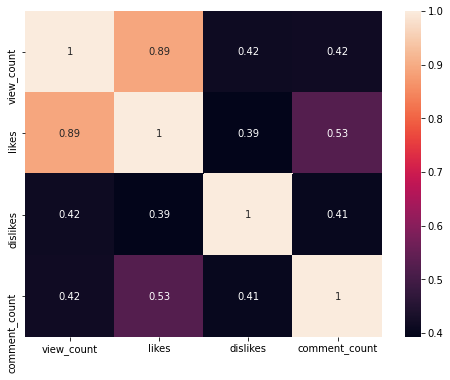

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(hm_data, annot=True)
plt.savefig('correlation.png')
plt.show()

# Views vs Category

In [ ]:
df_yout = df.drop(['thumbnail_link'], axis=1)

df_yout['category_name'] = np.nan

df_yout.loc[(df_yout['categoryId'] == 1),'category_name'] = 'Film and Animation'
df_yout.loc[(df_yout['categoryId'] == 2),'category_name'] = 'Cars and Vehicles'
df_yout.loc[(df_yout['categoryId'] == 10),'category_name'] = 'Music'
df_yout.loc[(df_yout['categoryId'] == 15),'category_name'] = 'Pets and Animals'
df_yout.loc[(df_yout['categoryId'] == 17),'category_name'] = 'Sport'
df_yout.loc[(df_yout['categoryId'] == 19),'category_name'] = 'Travel and Events'
df_yout.loc[(df_yout['categoryId'] == 20),'category_name'] = 'Gaming'
df_yout.loc[(df_yout['categoryId'] == 22),'category_name'] = 'People and Blogs'
df_yout.loc[(df_yout['categoryId'] == 23),'category_name'] = 'Comedy'
df_yout.loc[(df_yout['categoryId'] == 24),'category_name'] = 'Entertainment'
df_yout.loc[(df_yout['categoryId'] == 25),'category_name'] = 'News and Politics'
df_yout.loc[(df_yout['categoryId'] == 26),'category_name'] = 'How to and Style'
df_yout.loc[(df_yout['categoryId'] == 27),'category_name'] = 'Education'
df_yout.loc[(df_yout['categoryId'] == 28),'category_name'] = 'Science and Technology'
df_yout.loc[(df_yout['categoryId'] == 29),'category_name'] = 'Non Profits and Activism'
df_yout.loc[(df_yout['categoryId'] == 25),'category_name'] = 'News & Politics'

In [ ]:
df_yout['likes_log'] = np.log(df_yout['likes'])
df_yout['view_count_log'] = np.log(df_yout['view_count'])
df_yout['dislikes_log'] = np.log(df_yout['dislikes'])
df_yout['comment_log'] = np.log(df_yout['comment_count'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Category Name count
Entertainment       8351
Gaming              5914
Music               5658
Education           3835
People and Blogs    3708
Name: category_name, dtype: int64


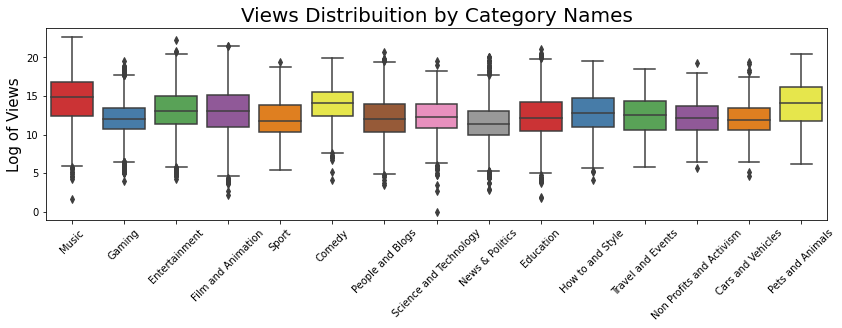

In [ ]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,10))


plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='view_count_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Log of Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.savefig('Views vs Category.png')
plt.show()

## Data Cleansing

#### Delete the unuseful columns in the dataset: ‘thumbnail_link’



In [ ]:
df_yout = df.drop(['thumbnail_link'], axis=1)

#### Create a new variable of category name mapping from category id

In [ ]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout['categoryId'] == 1),'category_name'] = 'Film and Animation'
df_yout.loc[(df_yout['categoryId'] == 2),'category_name'] = 'Cars and Vehicles'
df_yout.loc[(df_yout['categoryId'] == 10),'category_name'] = 'Music'
df_yout.loc[(df_yout['categoryId'] == 15),'category_name'] = 'Pets and Animals'
df_yout.loc[(df_yout['categoryId'] == 17),'category_name'] = 'Sport'
df_yout.loc[(df_yout['categoryId'] == 19),'category_name'] = 'Travel and Events'
df_yout.loc[(df_yout['categoryId'] == 20),'category_name'] = 'Gaming'
df_yout.loc[(df_yout['categoryId'] == 22),'category_name'] = 'People and Blogs'
df_yout.loc[(df_yout['categoryId'] == 23),'category_name'] = 'Comedy'
df_yout.loc[(df_yout['categoryId'] == 24),'category_name'] = 'Entertainment'
df_yout.loc[(df_yout['categoryId'] == 25),'category_name'] = 'News and Politics'
df_yout.loc[(df_yout['categoryId'] == 26),'category_name'] = 'How to and Style'
df_yout.loc[(df_yout['categoryId'] == 27),'category_name'] = 'Education'
df_yout.loc[(df_yout['categoryId'] == 28),'category_name'] = 'Science and Technology'
df_yout.loc[(df_yout['categoryId'] == 29),'category_name'] = 'Non Profits and Activism'
df_yout.loc[(df_yout['categoryId'] == 25),'category_name'] = 'News & Politics'

#### Normalize ‘view_count’, ‘likes’ and ‘comment_count’ to reduce the wide ranges of these variables

In [ ]:
df_yout['likes_log'] = np.log(df_yout['likes'])
df_yout['view_count_log'] = np.log(df_yout['view_count'])
df_yout['dislikes_log'] = np.log(df_yout['dislikes'])
df_yout['comment_log'] = np.log(df_yout['comment_count'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Convert True/False columns (e.g. ‘comments_disabled’) into binary variables


In [ ]:
df_yout['comments_disabled'] = df_yout['comments_disabled'].astype(int)
df_yout['ratings_disabled'] = df_yout['ratings_disabled'].astype(int)

#### Convert dtype to datetime and get the days took for a video to become trending

In [ ]:
df_yout['publishedAt'] = pd.to_datetime(df_yout['publishedAt'])
df_yout['trending_date'] = pd.to_datetime(df_yout['trending_date'])
df_yout['days2trend'] = df_yout['trending_date'] - df_yout['publishedAt'] 
# 1 means 0-1 days, 2 means 1-2 days, etc
df_yout['days2trend'] = df_yout['days2trend'].dt.days + 1

In [ ]:
# look at the new dataset after cleansing
df_yout.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,likes_log,view_count_log,dislikes_log,comment_log,days2trend
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People and Blogs,11.963415,14.230671,8.675051,10.472006,1
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,"While running her own modding shop, Ramya Pare...",Gaming,11.896411,14.683320,7.935230,9.714081,1
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,I left youtube for a month and this is what ha...,Entertainment,12.776450,14.527898,7.873978,10.602145,1
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music,10.054103,13.115884,7.526179,8.942069,1
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,Transforming The LaBrant Family's empty white ...,How to and Style,10.732083,13.932306,6.871091,7.694393,1


#### Export the new dataset to the 'data' folder for future use

In [ ]:
df_yout.to_csv('data_preprocessed.csv')
!cp data_preprocessed.csv "./data"

## Data Analysis/Visulization

#### Look at the view count distribuition by categories

Category Name count
Music               4580
Entertainment       3835
Sport               2402
Gaming              1864
People and Blogs    1724
Name: category_name, dtype: int64


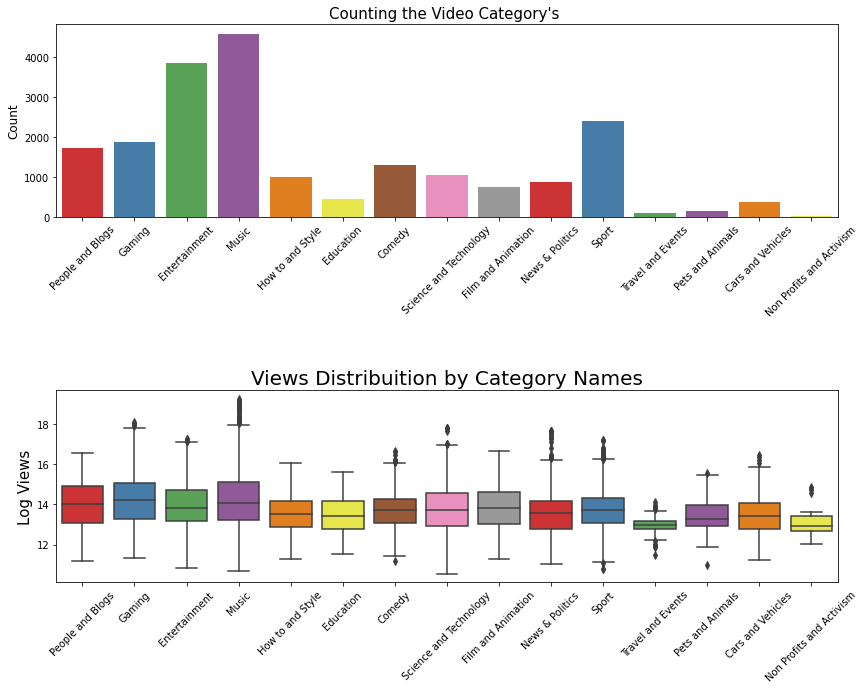

In [ ]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,10))

plt.subplot(211)
g = sns.countplot(x='category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='view_count_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Log Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

#### How long does it take for a video to become trending?

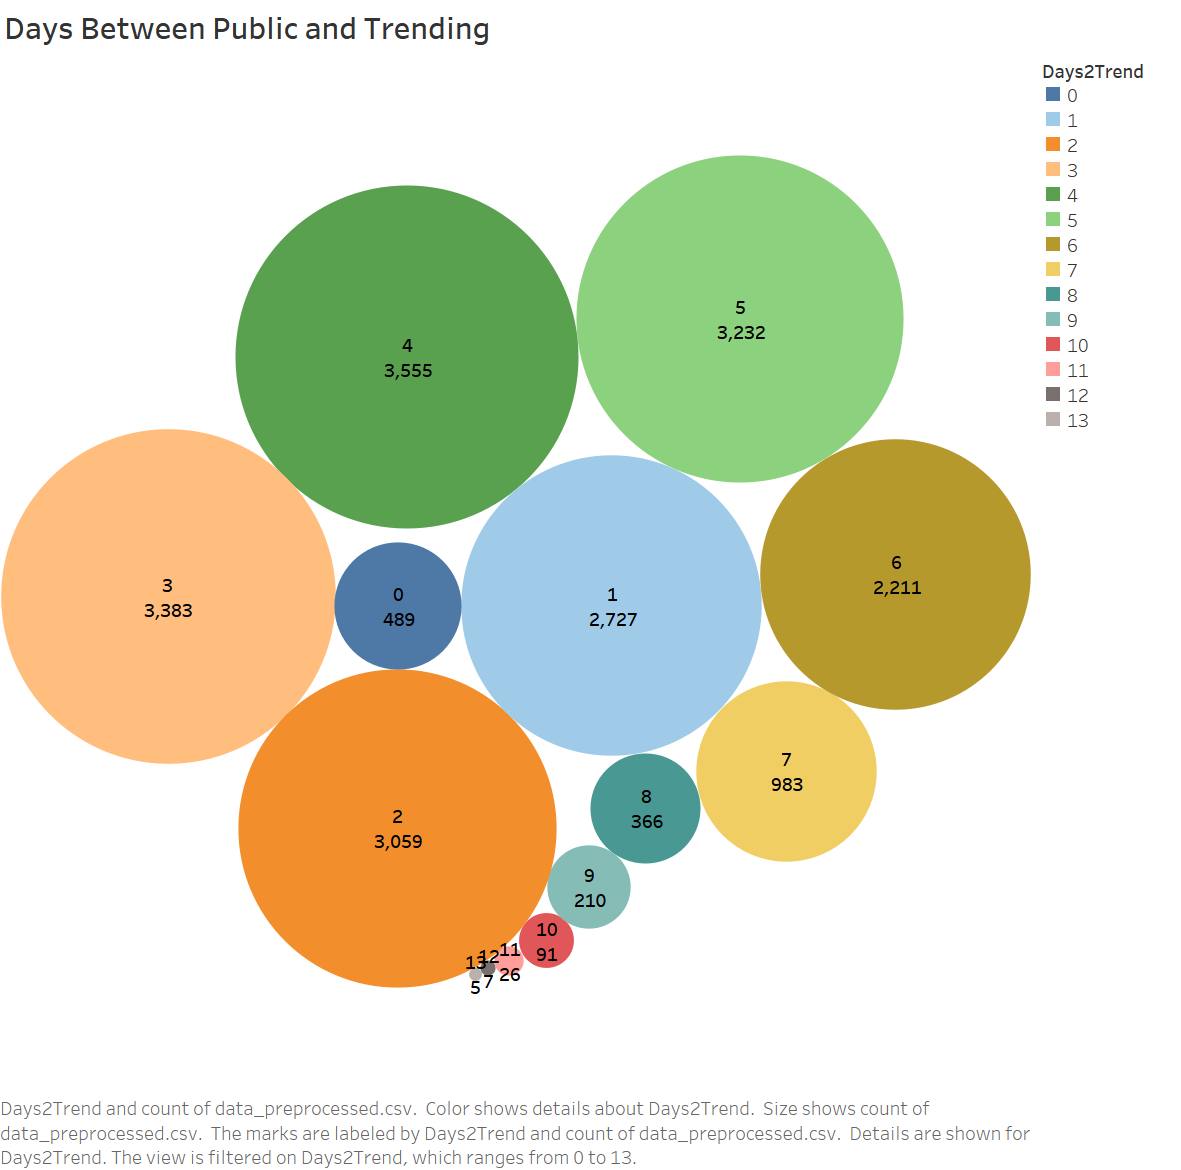

In [ ]:
# display a bubble graph plotted on Tableau
from IPython.display import Image
Image('./img/days2trend.png',width=700, height=700)


#### Visualize the WordCloud of title

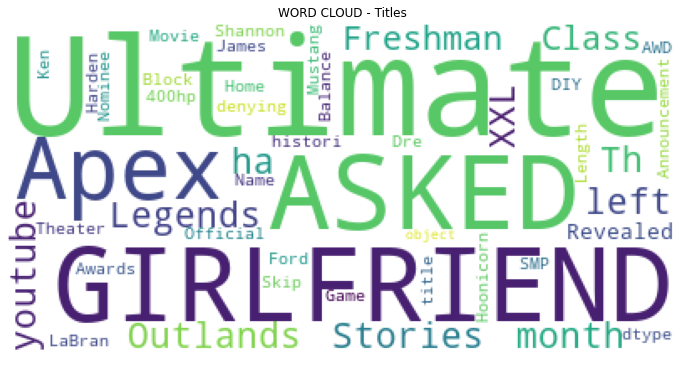

In [ ]:
plt.figure(figsize = (12,12))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Titles")
plt.axis('off')
plt.show()

#### Visualize the WordCloud of description

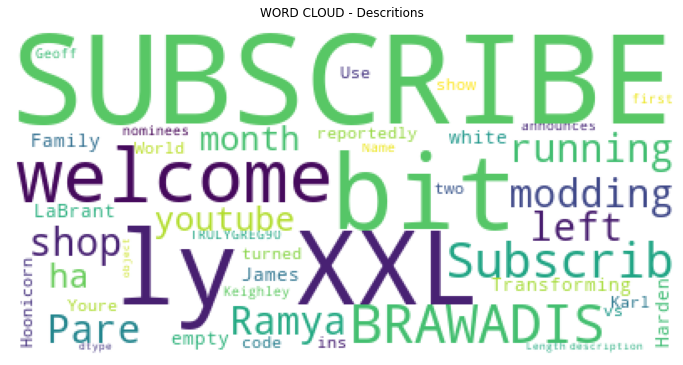

In [ ]:
plt.figure(figsize = (12,12))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Descritions")
plt.axis('off')
plt.show()

#### Visualize the WordCloud of tags

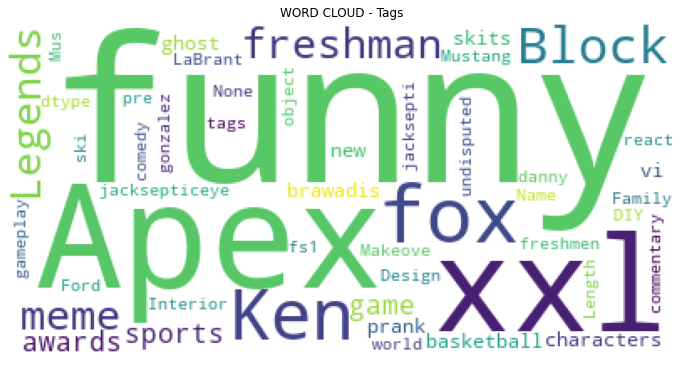

In [ ]:
plt.figure(figsize = (12,12))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['tags']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Tags")
plt.axis('off')
plt.show()